In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
state = 'AP'

In [3]:
c_dataset = pd.read_csv("Confirmed - copy.csv")
c_dataset['Date'] = pd.to_datetime(c_dataset['Date'], infer_datetime_format=True)
c_data = c_dataset.set_index(['Date'])
c_data = c_data[[state]]
c_data[state] = c_data[state].fillna(0)

In [4]:
cases = c_data[state].resample('D').mean()#D,W,MS

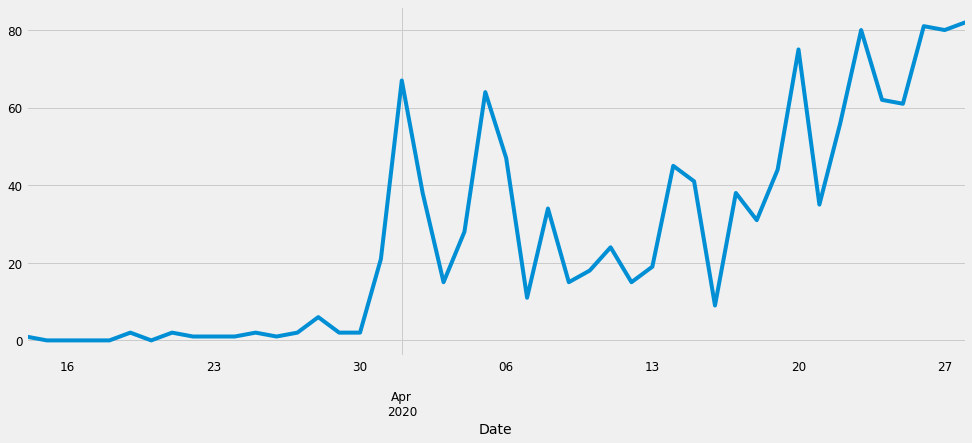

In [5]:
cases.plot(figsize=(15, 6))
plt.show()

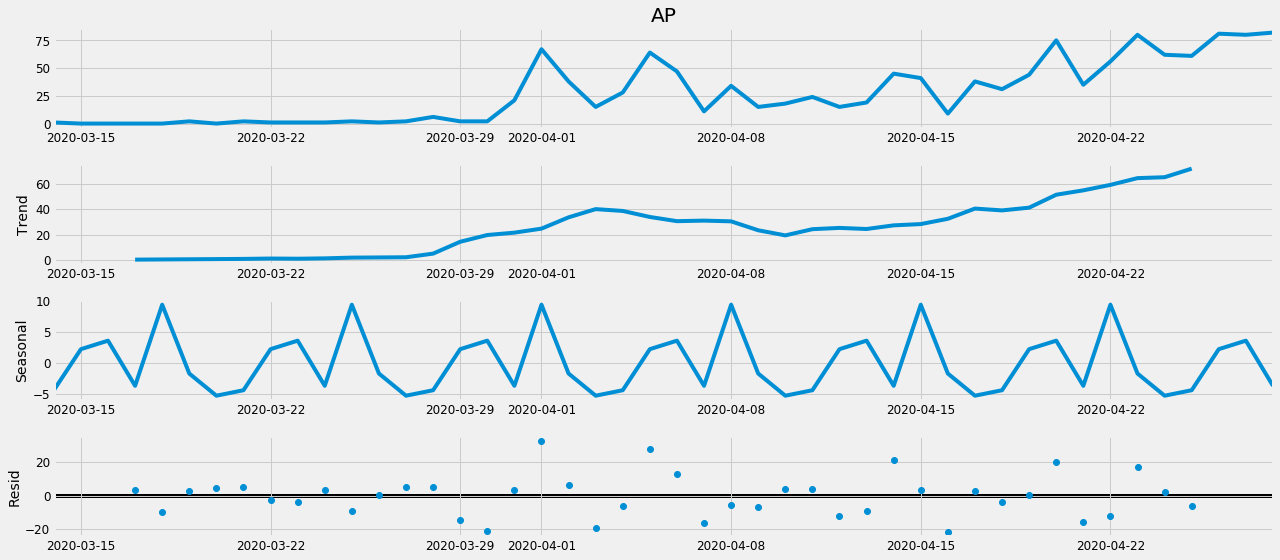

In [6]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
c_decomposition = sm.tsa.seasonal_decompose(cases, model='additive')
c_fig = c_decomposition.plot()
plt.show()

In [7]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [8]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            cases_mod = sm.tsa.statespace.SARIMAX(cases,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            cases_results = cases_mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, cases_results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:459.46378970069844


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1349.168436853715
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:329.3589292233134
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:212.79453136584658
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:339.46110645940695


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1293.4242433975164
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:221.42743738450707
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:212.182070833454
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:410.94235850904374
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2755.901724181732
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:300.9836430684936
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:190.36137933943422
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:319.9520166196956


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1449.659923172705
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:206.7891036063555
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:187.43966283223483
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:383.6333371093033
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1571.692419182169


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:300.6106762055115
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:183.82138554544844
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:298.95090881709115
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1344.079682714711
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:193.55458055328594
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:182.1087066544324
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:368.79882985092803


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1293.3532997874086
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:291.57335141584304
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:173.1633476805353
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:294.67567057832514


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:1304.5341483661114
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:191.1775265101615
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:173.17941229285424
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:392.45002413406326


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1606.1280577782425
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:307.92335348702966
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:194.3871150334958
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:300.22034229955636


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1590.6000702363683
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:194.63685129066272
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:192.6864066935142
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:376.42903604911345


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:1153.1380882826393
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:299.7950144712824
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:183.93264665265391
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:294.6590181245631


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:1139.0029880645536
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:190.38523973484854
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:179.5004520708341
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:382.7930577094712


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1349.8427995020402
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:302.45364070581377
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:184.47528661517313
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:291.3554690920168


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1340.0250958845795
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:185.83037137423074
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:183.8762486009413
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:370.5255667788842


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:1217.0176398667315
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:291.8271786523849
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:174.77358103778263
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:288.5621524888501


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:1313.972468332485
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:183.5359087716549
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:174.08389571024003


In [9]:
c_mod = sm.tsa.statespace.SARIMAX(cases,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
cases_results = c_mod.fit()
print(cases_results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2019      0.423      0.477      0.633      -0.627       1.031
ma.L1         -0.6953      0.354     -1.966      0.049      -1.388      -0.002
ma.S.L12      -1.0000   1.16e+04  -8.61e-05      1.000   -2.28e+04    2.28e+04
sigma2       265.1589   3.08e+06   8.61e-05      1.000   -6.03e+06    6.03e+06


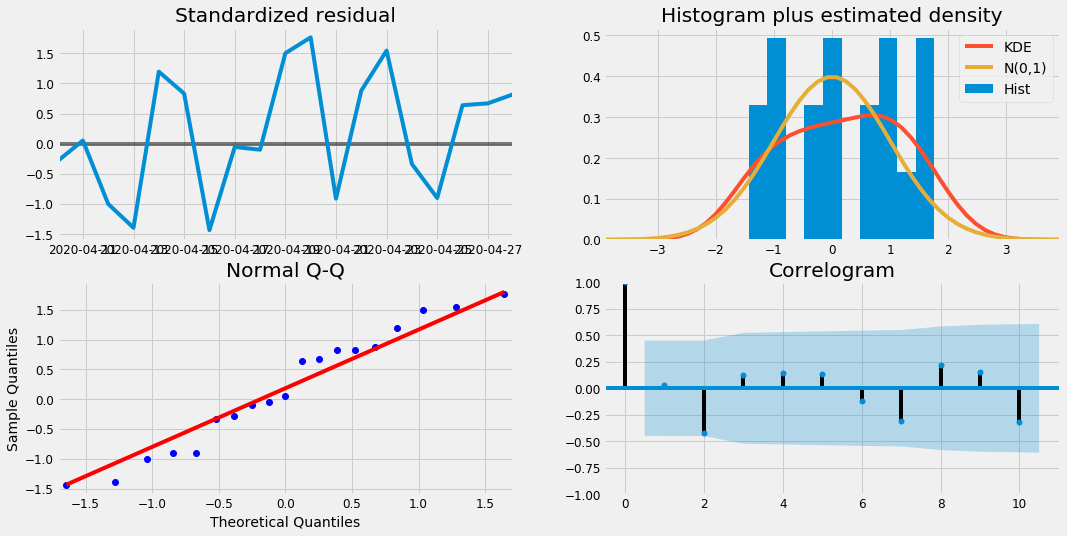

In [10]:
cases_results.plot_diagnostics(figsize=(16, 8))
plt.show()

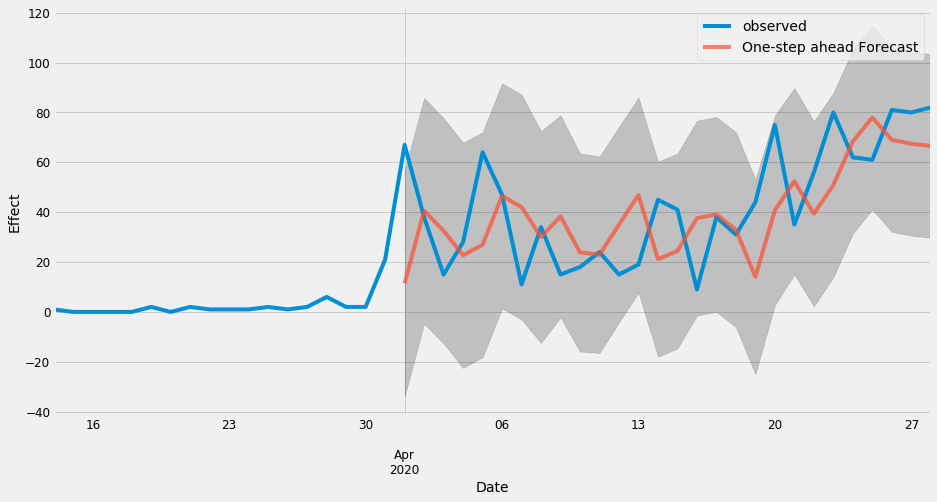

In [11]:
cases_pred = cases_results.get_prediction(start=pd.to_datetime('2020-04-01'), dynamic=False)
cases_pred_ci = cases_pred.conf_int()
cases_ax = cases['2020':].plot(label='observed')
cases_pred.predicted_mean.plot(ax=cases_ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
cases_ax.fill_between(cases_pred_ci.index,
                cases_pred_ci.iloc[:, 0],
                cases_pred_ci.iloc[:, 1], color='k', alpha=.2)
cases_ax.set_xlabel('Date')
cases_ax.set_ylabel('Effect')
plt.legend()
plt.show()

In [12]:
cases_forecasted = cases_pred.predicted_mean
cases_truth = cases['2020-04-01':]
cases_mse = ((cases_forecasted - cases_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(cases_mse, 2)))

The Mean Squared Error of our forecasts is 484.38


In [13]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(cases_mse), 2)))

The Root Mean Squared Error of our forecasts is 22.01


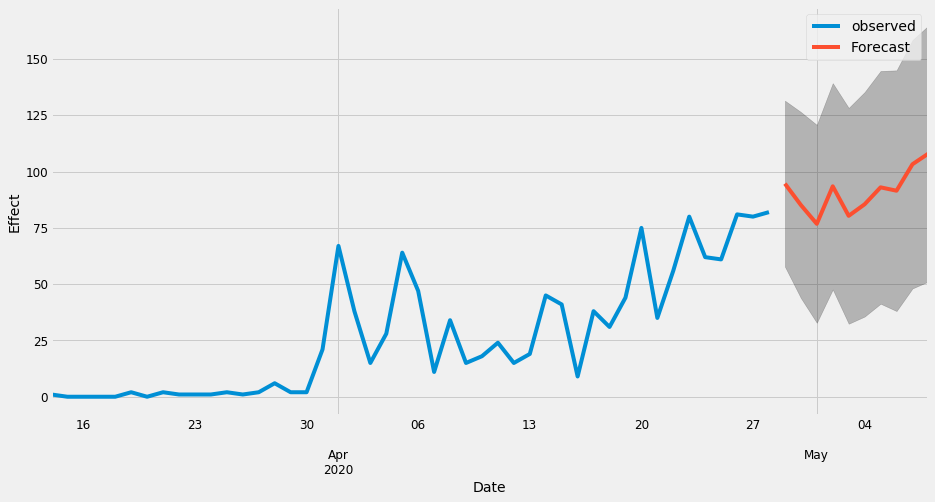

In [14]:
cases_pred_uc = cases_results.get_forecast(steps=10)
cases_pred_ci = cases_pred_uc.conf_int()
cases_ax = cases.plot(label='observed', figsize=(14, 7))
cases_pred_uc.predicted_mean.plot(ax=cases_ax, label='Forecast')
cases_ax.fill_between(cases_pred_ci.index,
                cases_pred_ci.iloc[:, 0],
                cases_pred_ci.iloc[:, 1], color='k', alpha=.25)
cases_ax.set_xlabel('Date')
cases_ax.set_ylabel('Effect')
plt.legend()
plt.show()

In [15]:
r_dataset = pd.read_csv("Recovered.csv")
r_dataset['Date'] = pd.to_datetime(r_dataset['Date'], infer_datetime_format=True)
r_data = r_dataset.set_index(['Date'])
r_data = r_data[[state]]
r_data[state] = r_data[state].fillna(0)

In [16]:
total_data = pd.DataFrame()
total_data['Cases'] = c_data[state]
total_data['Recovered'] = r_data[state]

In [17]:
total_data.tail()

,Cases,Recovered
Date,,
2020-04-24,62,4
2020-04-25,61,26
2020-04-26,81,60
2020-04-27,80,4
2020-04-28,82,23


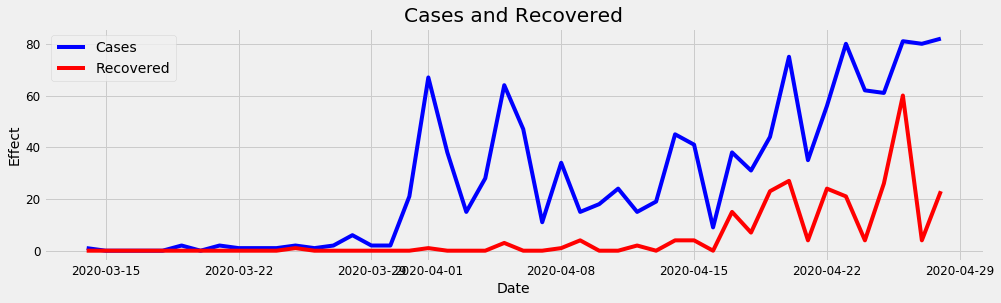

In [18]:
plt.figure(figsize=(15, 4))
plt.plot(total_data.index, total_data['Cases'], 'b-', label = 'Cases')
plt.plot(total_data.index, total_data['Recovered'], 'r-', label = 'Recovered')
plt.xlabel('Date'); plt.ylabel('Effect'); plt.title('Cases and Recovered')
plt.legend()
plt.show()

In [19]:
recovered = total_data['Recovered'].resample('D').mean()

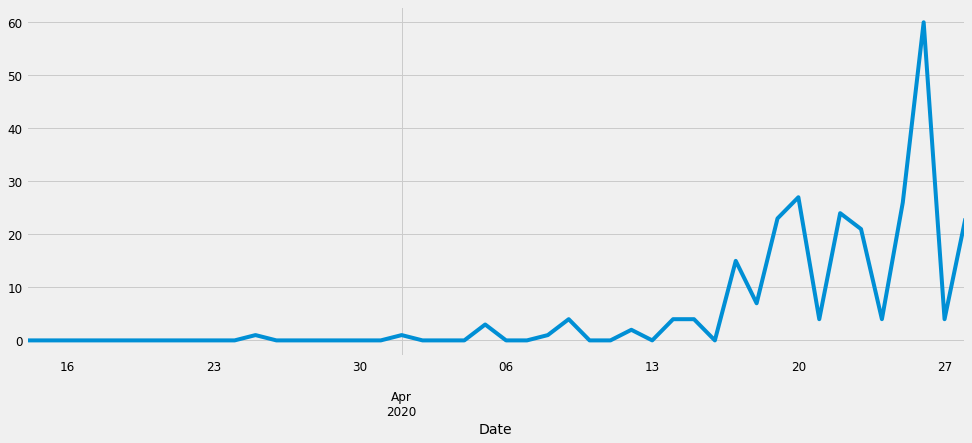

In [20]:
recovered.plot(figsize=(15, 6))
plt.show()

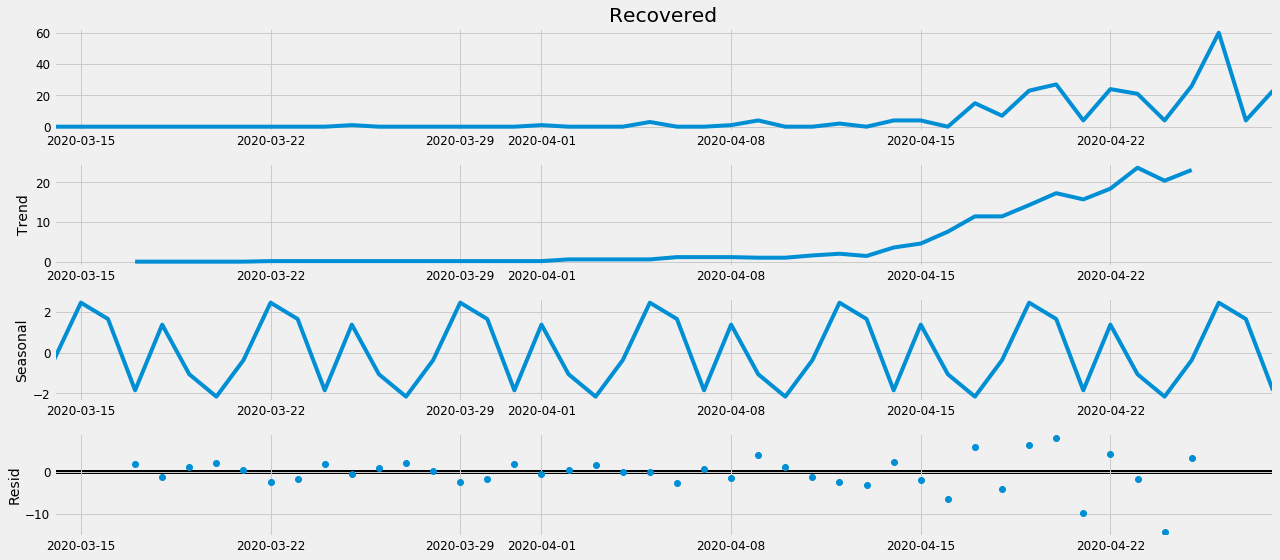

In [21]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
recovered_decomposition = sm.tsa.seasonal_decompose(recovered, model='additive')
fig = recovered_decomposition.plot()
plt.show()

In [22]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            recovered_mod = sm.tsa.statespace.SARIMAX(recovered,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            recovered_results = recovered_mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, recovered_results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:359.7198156253949


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1347.8718974134624
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:271.6006651265102
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:184.6283147470997
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:273.59547879645794
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1384.6737835125646
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:189.09566592619734


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:183.70686232110643
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:346.3517973617519


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1244.9785876180035
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:261.7142883911509
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:176.29682376505477
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:273.28357459753585


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1267.782143996206
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:190.71225905181473
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:177.7666695602777
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:350.0051643669936


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1460.5820839066087
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:266.59057562070836
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:178.50542984765653
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:273.9155862486144


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1580.6865028102545
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:185.71577811690705
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:180.0200860266776
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:320.08823550163294


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1308.534982596315
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:241.95358785697175
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:160.86426709328944
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:257.7542155642983


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:1318.4909287957346
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:175.1515783230147
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:162.8642618211737
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:347.94975053153485


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1335.931788556325
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:266.3687328636875
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:182.39173131927555
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:268.4091646850295


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1364.3903890853062
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:182.39173101389338
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:184.39173362571208
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:325.9683327391176


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:1153.1519993928778
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:248.87172960425403
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:168.25469698105354
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:257.8304805419316
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:1180.0186070459795
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:176.58227169632775
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:170.25468601630837
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:339.20968394796773


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1392.0664078526943
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:258.83197617536246
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:174.44866490272298
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:259.8638125379985
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1394.8640434160518
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:174.06186005276152
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:176.05967866731024
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:320.33227576190234


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:1385.6574596129647
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:242.2946928176765
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:161.8915970253412
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:251.37438297727226


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:1387.6680967274672
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:169.0403075350216
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:163.89159694565564


In [23]:
#ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:199.83565329572556
recovered_mod = sm.tsa.statespace.SARIMAX(recovered,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
recovered_results = recovered_mod.fit()
print(recovered_results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2578      0.524     -0.492      0.623      -1.284       0.769
ma.L1         -0.6993      0.323     -2.164      0.030      -1.333      -0.066
ma.S.L12      -0.0224      2.993     -0.007      0.994      -5.888       5.843
sigma2       192.7939     67.165      2.870      0.004      61.153     324.435


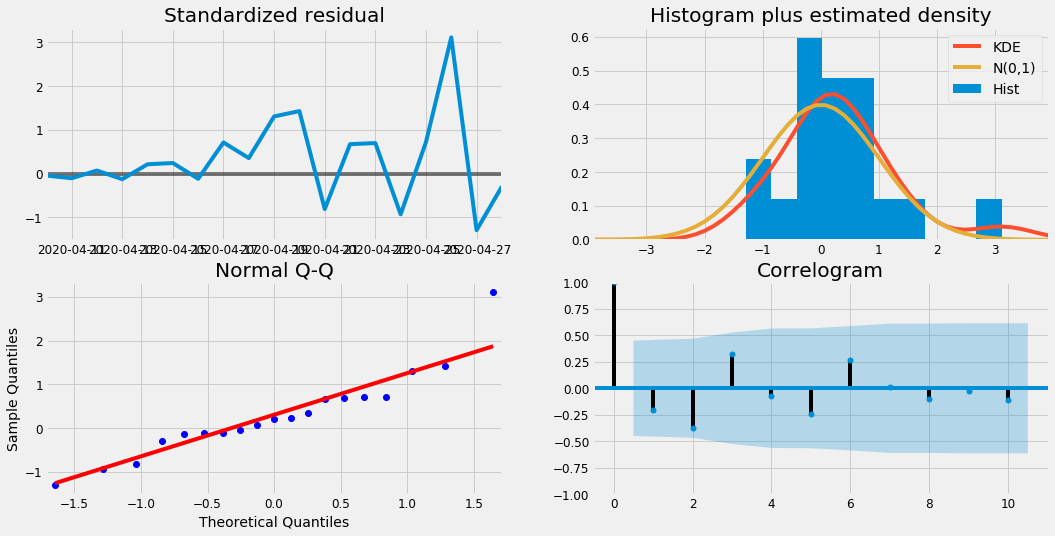

In [24]:
recovered_results.plot_diagnostics(figsize=(16, 8))
plt.show()

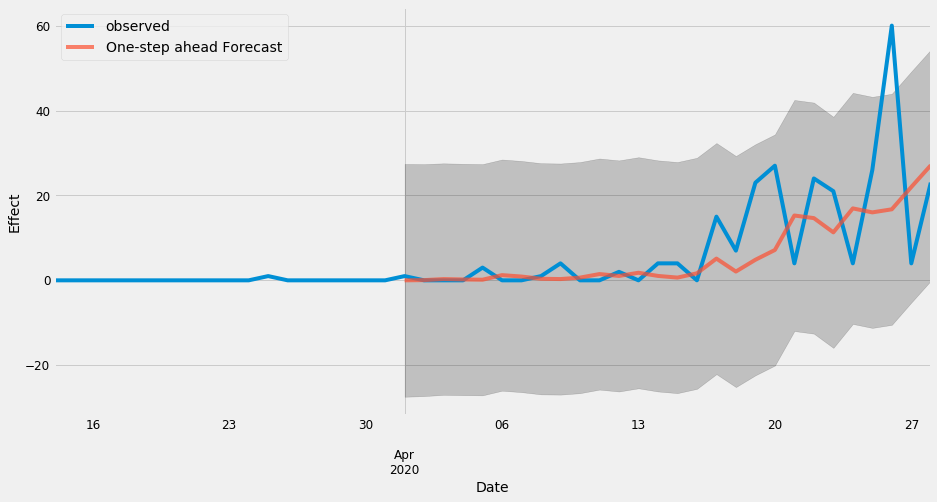

In [25]:
recovered_pred = recovered_results.get_prediction(start=pd.to_datetime('2020-04-01'), dynamic=False)
recovered_pred_ci = recovered_pred.conf_int()
recovered_ax = recovered['2020':].plot(label='observed')
recovered_pred.predicted_mean.plot(ax=recovered_ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
recovered_ax.fill_between(recovered_pred_ci.index,
                recovered_pred_ci.iloc[:, 0],
                recovered_pred_ci.iloc[:, 1], color='k', alpha=.2)
recovered_ax.set_xlabel('Date')
recovered_ax.set_ylabel('Effect')
plt.legend()
plt.show()

In [26]:
recovered_forecasted = recovered_pred.predicted_mean
recovered_truth = recovered['2020-04-01':]
recovered_mse = ((recovered_forecasted - recovered_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(recovered_mse, 2)))

The Mean Squared Error of our forecasts is 131.75


In [27]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(recovered_mse), 2)))

The Root Mean Squared Error of our forecasts is 11.48


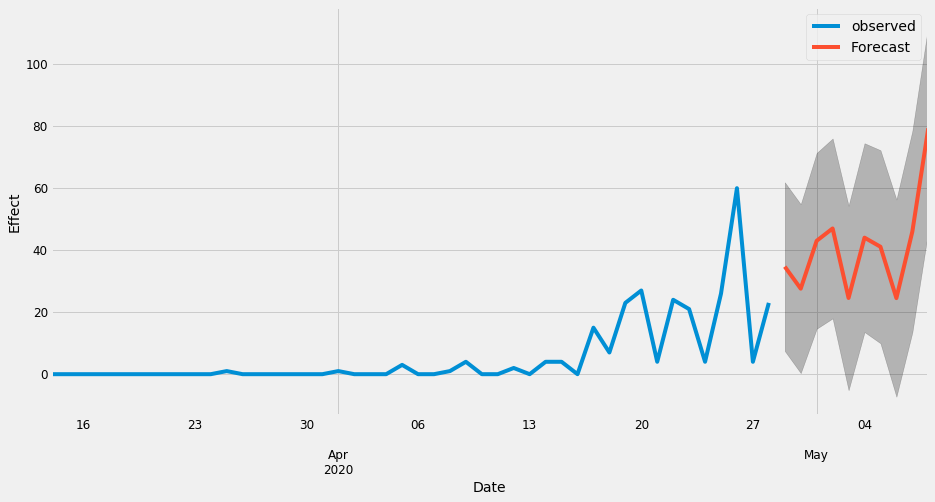

In [28]:
recovered_pred_uc = recovered_results.get_forecast(steps=10)
recovered_pred_ci = recovered_pred_uc.conf_int()
recovered_ax = recovered.plot(label='observed', figsize=(14, 7))
recovered_pred_uc.predicted_mean.plot(ax=recovered_ax, label='Forecast')
recovered_ax.fill_between(recovered_pred_ci.index,
                recovered_pred_ci.iloc[:, 0],
                recovered_pred_ci.iloc[:, 1], color='k', alpha=.25)
recovered_ax.set_xlabel('Date')
recovered_ax.set_ylabel('Effect')
plt.legend()
plt.show()

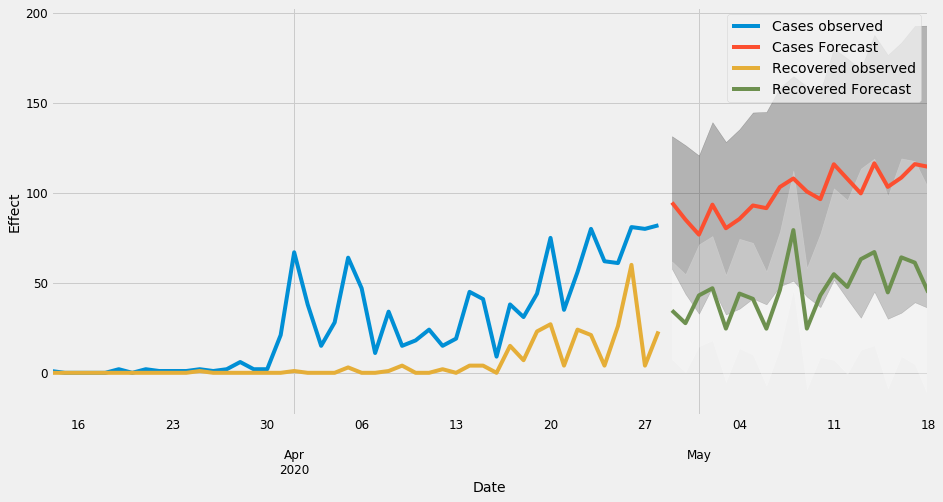

In [29]:
cases_pred_uc = cases_results.get_forecast(steps=20)
cases_pred_ci = cases_pred_uc.conf_int()
cases_ax = cases.plot(label='Cases observed', figsize=(14, 7))
cases_pred_uc.predicted_mean.plot(ax=cases_ax, label='Cases Forecast')
cases_ax.fill_between(cases_pred_ci.index,
                cases_pred_ci.iloc[:, 0],
                cases_pred_ci.iloc[:, 1], color='k', alpha=.25)

recovered_pred_uc = recovered_results.get_forecast(steps=20)
recovered_pred_ci = recovered_pred_uc.conf_int()
recovered_ax = recovered.plot(label='Recovered observed', figsize=(14, 7))
recovered_pred_uc.predicted_mean.plot(ax=recovered_ax, label='Recovered Forecast')
recovered_ax.fill_between(recovered_pred_ci.index,
                recovered_pred_ci.iloc[:, 0],
                recovered_pred_ci.iloc[:, 1], color='w', alpha=.25)

cases_ax.set_xlabel('Date')
cases_ax.set_ylabel('Effect')
recovered_ax.set_xlabel('Date')
recovered_ax.set_ylabel('Effect')
plt.legend()
plt.show()

In [30]:
cases_pred_uc = cases_results.get_forecast(steps=100)
cases_pred_ci = cases_pred_uc.conf_int()
cases_result_date = pd.DataFrame(cases_pred_uc.predicted_mean)

In [31]:
cases_end_date = str(cases_result_date.index[cases_result_date[0]<=0.0].tolist()[0])
print("The predicted last date on which the cases will become 0 is: " + cases_end_date.split()[0])

IndexError: list index out of range

In [32]:
int(np.mean(cases_result_date)[0])

176

In [33]:
int(min(cases_result_date[0]))

76

In [34]:
cases_end_date = str(cases_result_date.index[cases_result_date[0]<=np.ceil(min(cases_result_date[0]))].tolist()[0])
print("The predicted last date on which the cases will become 0 is: " + cases_end_date.split()[0])

The predicted last date on which the cases will become 0 is: 2020-05-01


In [35]:
cases_pred_uc = cases_results.get_forecast(steps=100)
cases_pred_ci = cases_pred_uc.conf_int()
cases_result_date = pd.DataFrame(cases_pred_uc.predicted_mean)

recovered_pred_uc = recovered_results.get_forecast(steps=100)
recovered_pred_ci = recovered_pred_uc.conf_int()
recovered_result_date = pd.DataFrame(recovered_pred_uc.predicted_mean)

In [36]:
cases_end_date = str(cases_result_date.index[recovered_result_date[0]>=int(np.mean(cases_result_date)[0])].tolist()[0])
print("The predicted last date on which the cases will become 0 is: " + cases_end_date.split()[0])

The predicted last date on which the cases will become 0 is: 2020-07-07


In [37]:
cases_end_date = str(cases_result_date.index[recovered_result_date[0]>=int(np.mean(recovered_result_date)[0])].tolist()[0])
print("The predicted last date on which the cases will become 0 is: " + cases_end_date.split()[0])

The predicted last date on which the cases will become 0 is: 2020-06-01
